In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('quicksort_benchmark_raw.csv', names=["array_size", "recursion", "time"])

In [3]:
# Define log function
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
array_size    3000 non-null int64
recursion     3000 non-null int64
time          3000 non-null int64
dtypes: int64(3)
memory usage: 70.4 KB


In [5]:
#Convert array_size to category type
df["array_size"] = df.array_size.astype('category')

In [6]:
#Apply log transformation on time
df['log_time'] = df['time'].apply(log_trans)

In [7]:
#Create subset that only contains a few selective arrays w recursion limits <= 40
df_reduced = df[df.array_size.isin([30000, 40000, 70000, 100000, 200000, 500000, 800000, 3000000])].query('recursion <= 40')

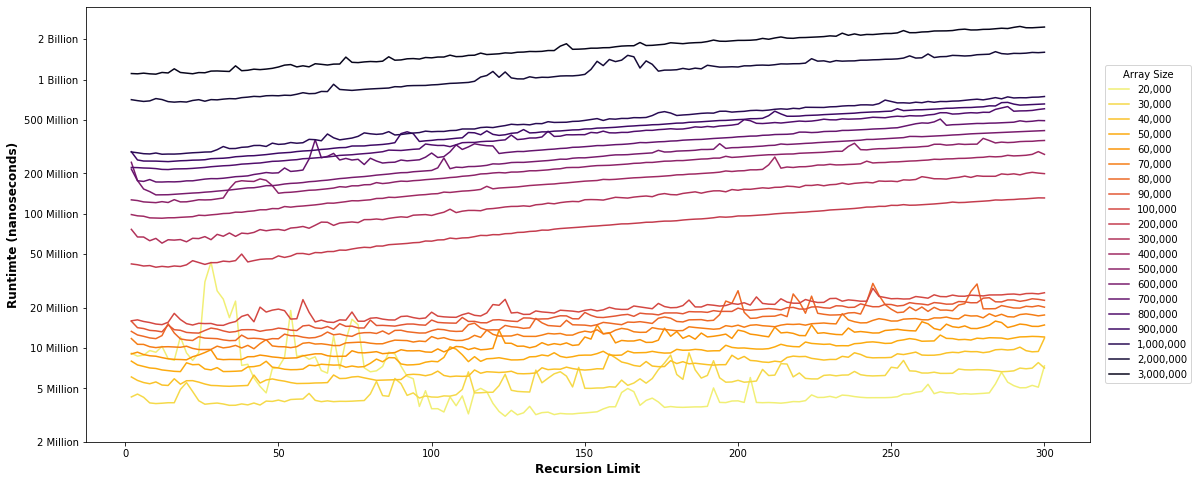

In [8]:
#Codes for the main graph that illustrates the impact of recursion limit on different array sizes in terms of run time
plt.figure(figsize=[18,8])
tick_locs= [2000000,5000000, 10000000,20000000,50000000,100000000,200000000,500000000,1000000000,2000000000]
tick_labels= ["2 Million","5 Million", "10 Million","20 Million","50 Million","100 Million","200 Million","500 Million","1 Billion","2 Billion"]
legend_labels = [format(x,",") for x in df.array_size.unique()]

sb.lineplot(data=df, x="recursion", y="log_time", hue="array_size", palette=sb.color_palette('inferno_r', n_colors=20), legend=False)

plt.yticks(log_trans(tick_locs), tick_labels)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.xlabel("Recursion Limit", fontsize=12,weight="bold")
plt.ylabel("Runtimte (nanoseconds)", fontsize=12, weight="bold")
plt.legend(title="Array Size",loc='center left', bbox_to_anchor=(1.01, 0.5),labels=legend_labels)
plt.savefig('subset_with_comment.png', dpi=300);

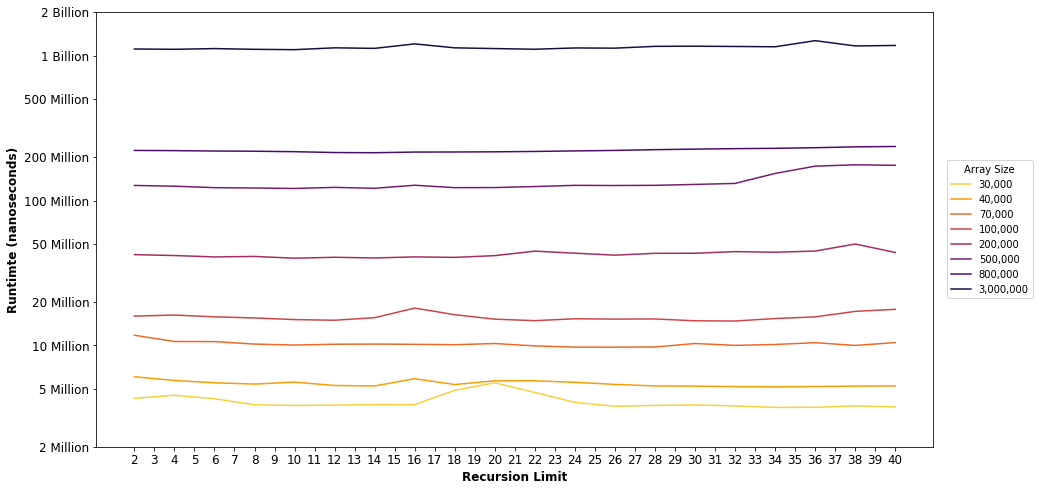

In [9]:
#Codes for the second grap where I filtered and zoomed to a particular range of interest for recursion limit vs array size
plt.figure(figsize=[15,8])

xtick_labels = np.arange(2,41)
ytick_locs= [2000000,5000000, 10000000,20000000,50000000,100000000,200000000,500000000,1000000000,2000000000]
ytick_labels= ["2 Million","5 Million", "10 Million","20 Million","50 Million","100 Million","200 Million","500 Million","1 Billion","2 Billion"]
legend_labels = [format(x,",") for x in df_reduced.array_size.unique()]

sb.lineplot(data=df_reduced, x="recursion", y="log_time", hue="array_size", palette=sb.color_palette('inferno_r', n_colors=8), legend=False)

plt.xticks(xtick_labels,xtick_labels)
plt.yticks(log_trans(tick_locs), tick_labels)


plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

plt.xlabel("Recursion Limit", fontsize=12,weight="bold")
plt.ylabel("Runtimte (nanoseconds)", fontsize=12, weight="bold")
plt.legend(title="Array Size",loc='center left', bbox_to_anchor=(1.01, 0.5),labels=legend_labels)
plt.savefig('full_results_with_comment.png', dpi=300);